In [1]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Algerian_forest_fires_dataset.csv", header=1)

In [3]:
df = data.copy()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [6]:
# Valeurs manquantes
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [8]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [10]:
df[["Region"]] = df[["Region"]].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [13]:
# Supprimer les valeurs manquantes
df = df.dropna().reset_index(drop=True)

In [14]:
# Vérification
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
# Affichons l'entête de la deuxieme region de notre df
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [16]:
# Supprimons cela car repetitif 
df = df.drop(122).reset_index(drop=True)

In [17]:
# Vérification
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [19]:
# Suppression des espace dans les noms de columns
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


## Changer le type des colonnes obligatoires en entier

In [21]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'WS']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
 15  WS           243 non-null    int32 
dtypes: int32(7), object(9)
memory usage: 23.9+ KB


## Changer les autres colonnes en float

In [23]:
objects = [features for features in df.columns if df[features].dtype == 'O']

In [24]:
for object in objects:
    if object != 'Classes':
        df[object] = df[object].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
 15  WS           243 non-null    int32  
dtypes: float64(8), int32(7), object(1)
memory usage: 23.9+ KB


In [25]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,WS
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942,15.493827
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028,2.811385
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,6.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,14.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000,15.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,17.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,29.000000


# Analyse Exploratoire de Données

In [26]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WS
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,18
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,13
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,22
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,13
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,16


In [27]:
# Supprimons les colonnes pas necessaire pour la prediction
df_copy = df.drop(columns=["day", "month", "year"]) # ou df.drop(["day", "month", "year"], axis=1) 

In [28]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WS
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,18
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,13
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,22
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,13
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,16


In [29]:
# Catégorie de la colonne Cllasses
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [30]:
# Encodons les catégories de la colonne Classes avec np.where
# ou ça s'il n'y a pas d'espace par exemple dans tes catégories:
# df_copy['Classes'] = np.where(df_copy['Classes'] == 'not fire', 0, 1)

df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)


In [31]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WS
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,18
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,13
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,22
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,13
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,16


In [32]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WS
238,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1,14
239,28,87,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1,15
240,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1,29
241,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1,18
242,24,64,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1,15


In [33]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

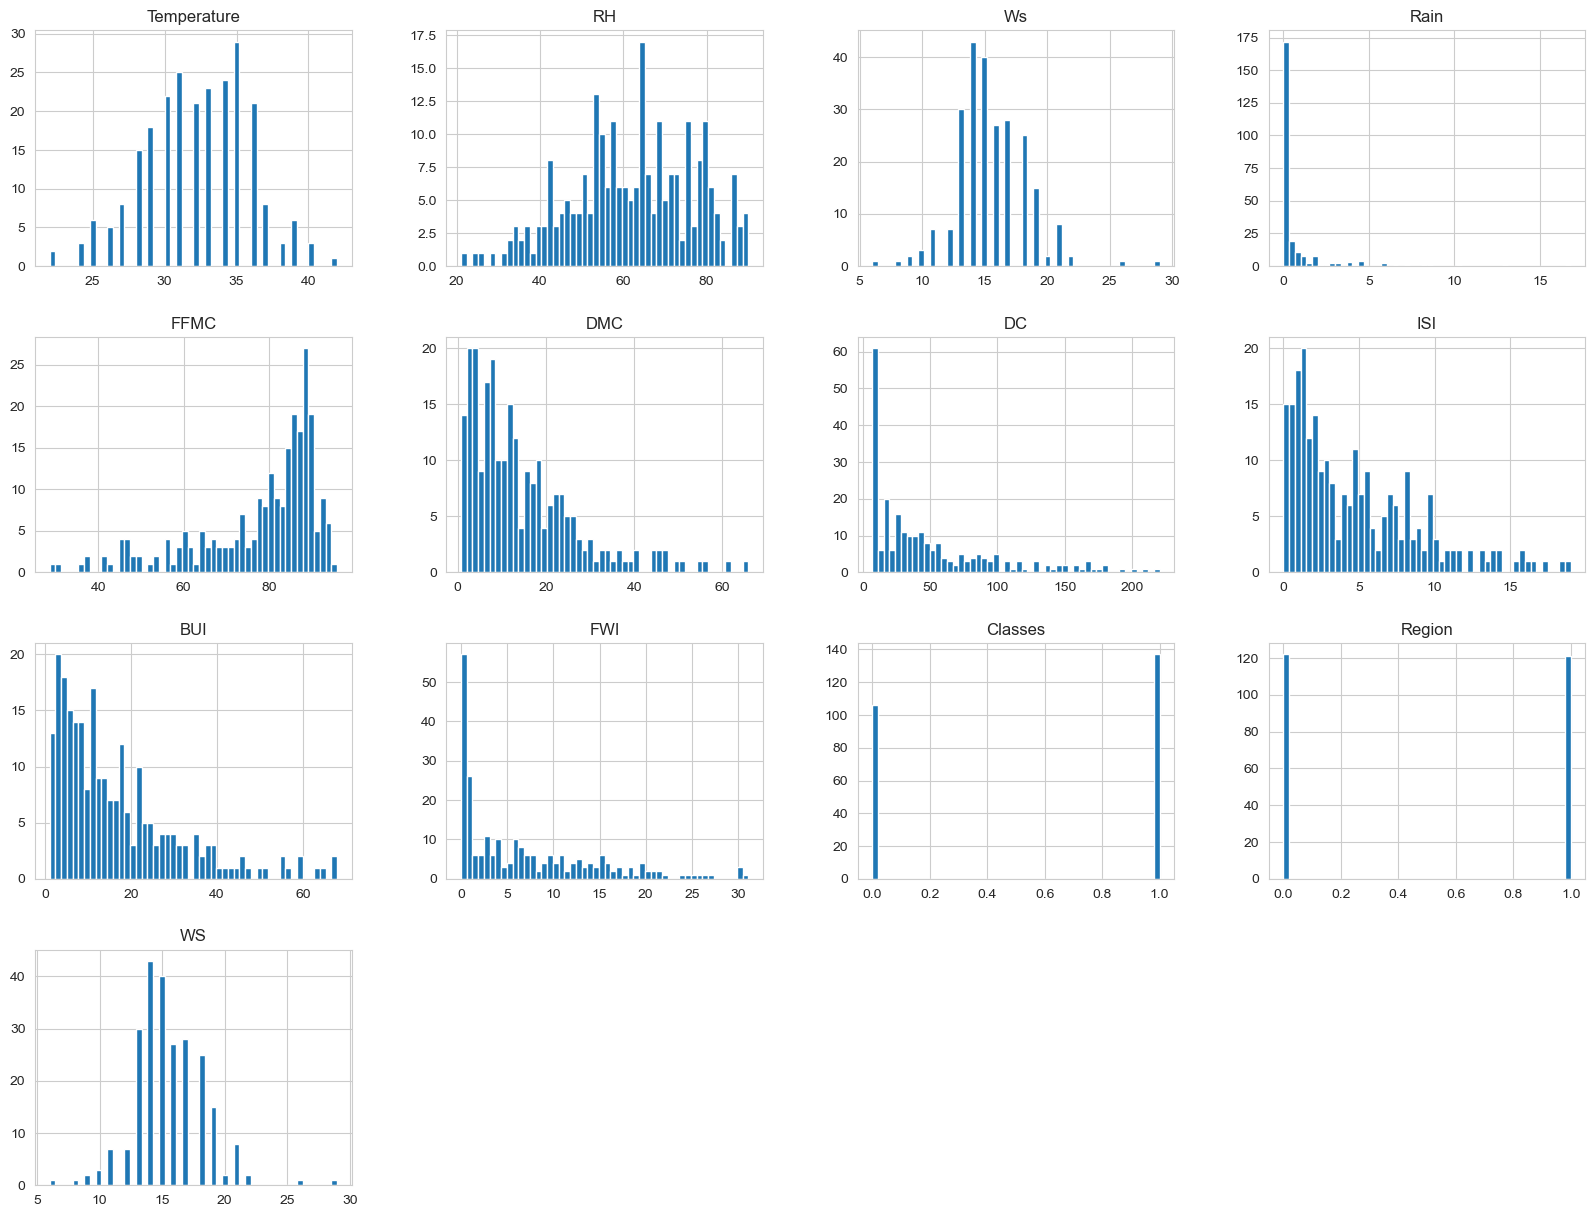

In [34]:
# Visualisation de la densité des variables
sns.set_style("whitegrid")
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

In [35]:
# Pourcentage des catégories fire et not fire
pourcentage = df_copy['Classes'].value_counts(normalize=True)*100


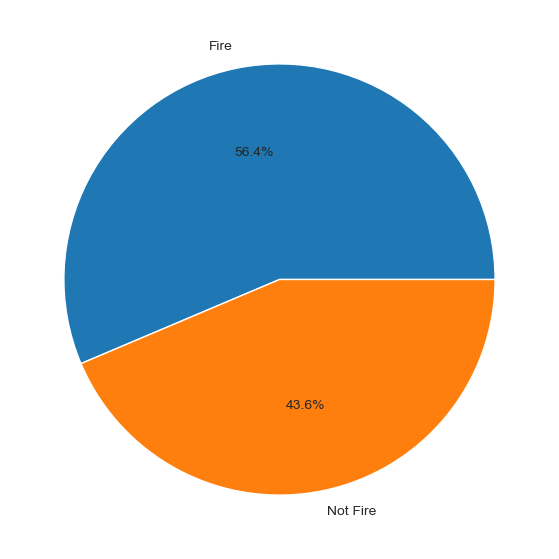

In [36]:
classlabel = ["Fire", "Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(pourcentage, labels = classlabel, autopct='%.1f%%')
plt.show()

In [37]:
# Analysons l'incendie par région selon le mois
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')

Text(0.5, 1.0, 'Analyse Incendie pour la Région de Bejaia')

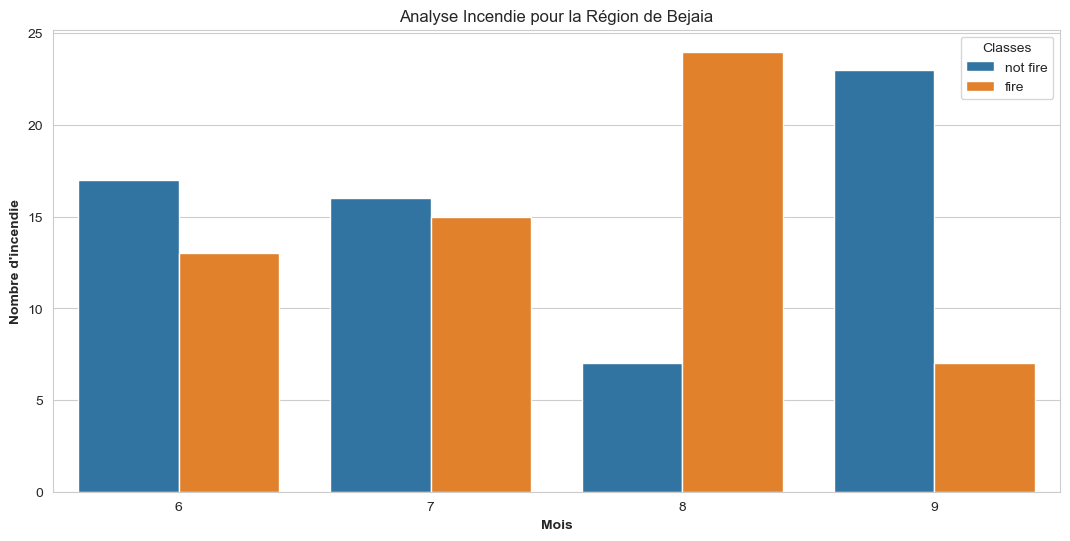

In [38]:
# Région de Bejaia
df_temps_bejaia = df.loc[df['Region'] == 0]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x='month', hue='Classes', data=df_temps_bejaia)
plt.xlabel("Mois", weight='bold')
plt.ylabel("Nombre d'incendie", weight='bold')
plt.title("Analyse Incendie pour la Région de Bejaia")

Text(0.5, 1.0, 'Analyse Incendie pour la Région de Sidi Bel')

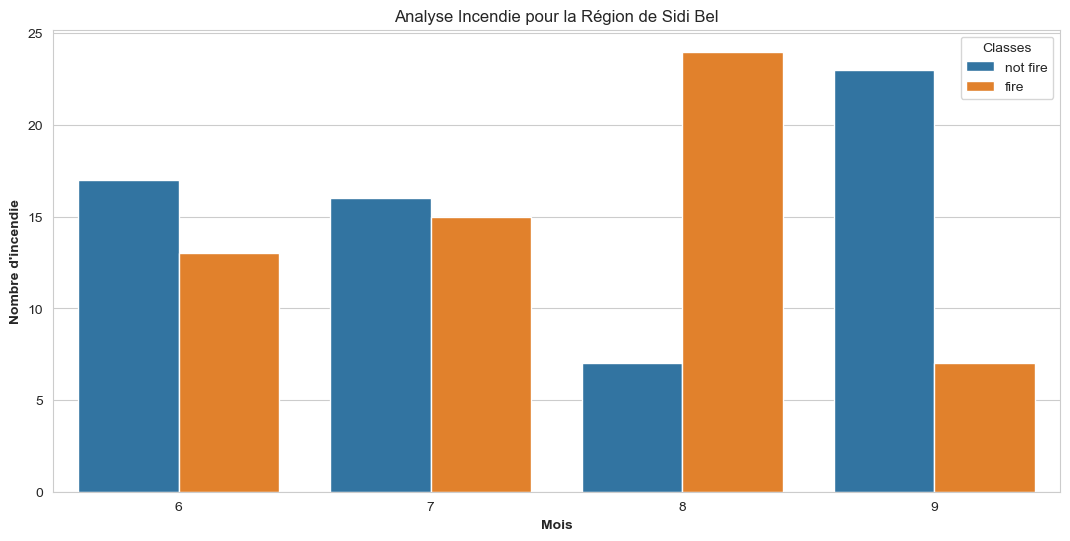

In [39]:
# Région de Sidi Bel
df_temps_sidi_bel = df.loc[df['Region'] == 1]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x='month', hue='Classes', data=df_temps_bejaia)
plt.xlabel("Mois", weight='bold')
plt.ylabel("Nombre d'incendie", weight='bold')
plt.title("Analyse Incendie pour la Région de Sidi Bel")

On observe plus d'incendie durant le mois d'août et moins d'incendie en septembre

# Correlation

In [40]:
# Matrice de correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WS
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555,-0.284510
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682,0.244048
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160,1.000000
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013,0.171506
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241,-0.166548
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089,-0.000721
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734,0.079135
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197,0.008532
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408,0.031438
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102,0.032368


<Axes: >

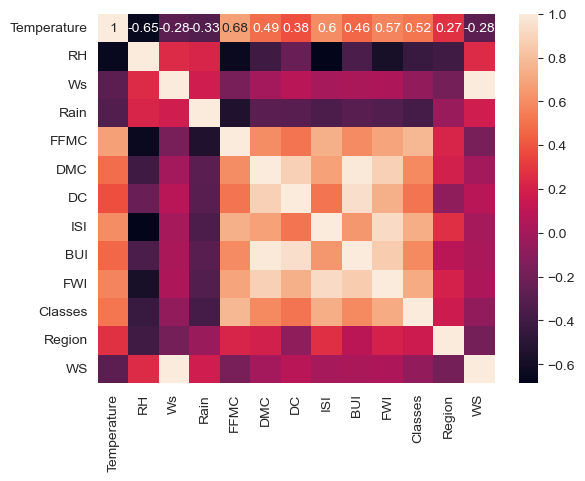

In [41]:
# Véification de multicolinéarité
sns.heatmap(df_copy.corr(), annot=True)

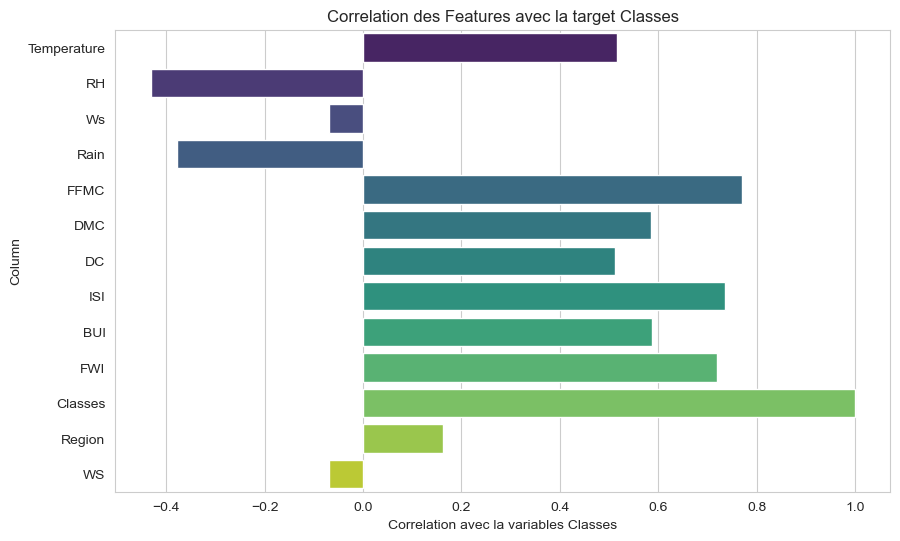

In [42]:
# Series de corrélation pour 'Classes'
corr_classes = df_copy.corr()['Classes']

df_corr_classes = pd.DataFrame(corr_classes).reset_index()


df_corr_classes.columns = ['Column', 'Correlation avec la variables Classes']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_corr_classes, y='Column', x='Correlation avec la variables Classes', palette='viridis')
plt.title('Correlation des Features avec la target Classes')
plt.show()


In [43]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features = correlation(df_copy, 0.85)
corr_features

{'BUI', 'DC', 'DMC', 'ISI', 'Ws'}

Text(0.5, 1.0, 'Données')

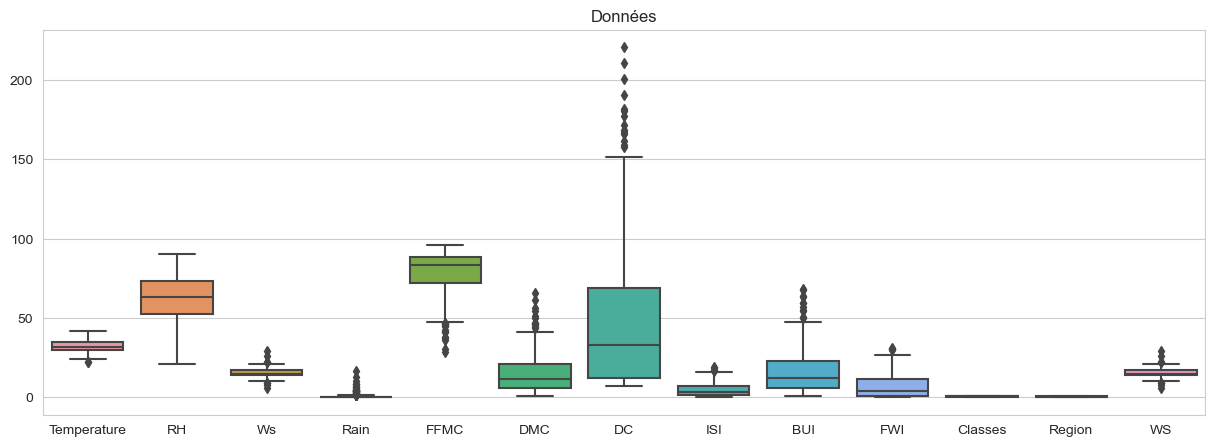

In [45]:
# # Visualisation des valeurs aberantes
plt.subplots(figsize=(15, 5))
# plt.subplot(1, 2, 1)
sns.boxplot(data=df_copy)
plt.title('Données')

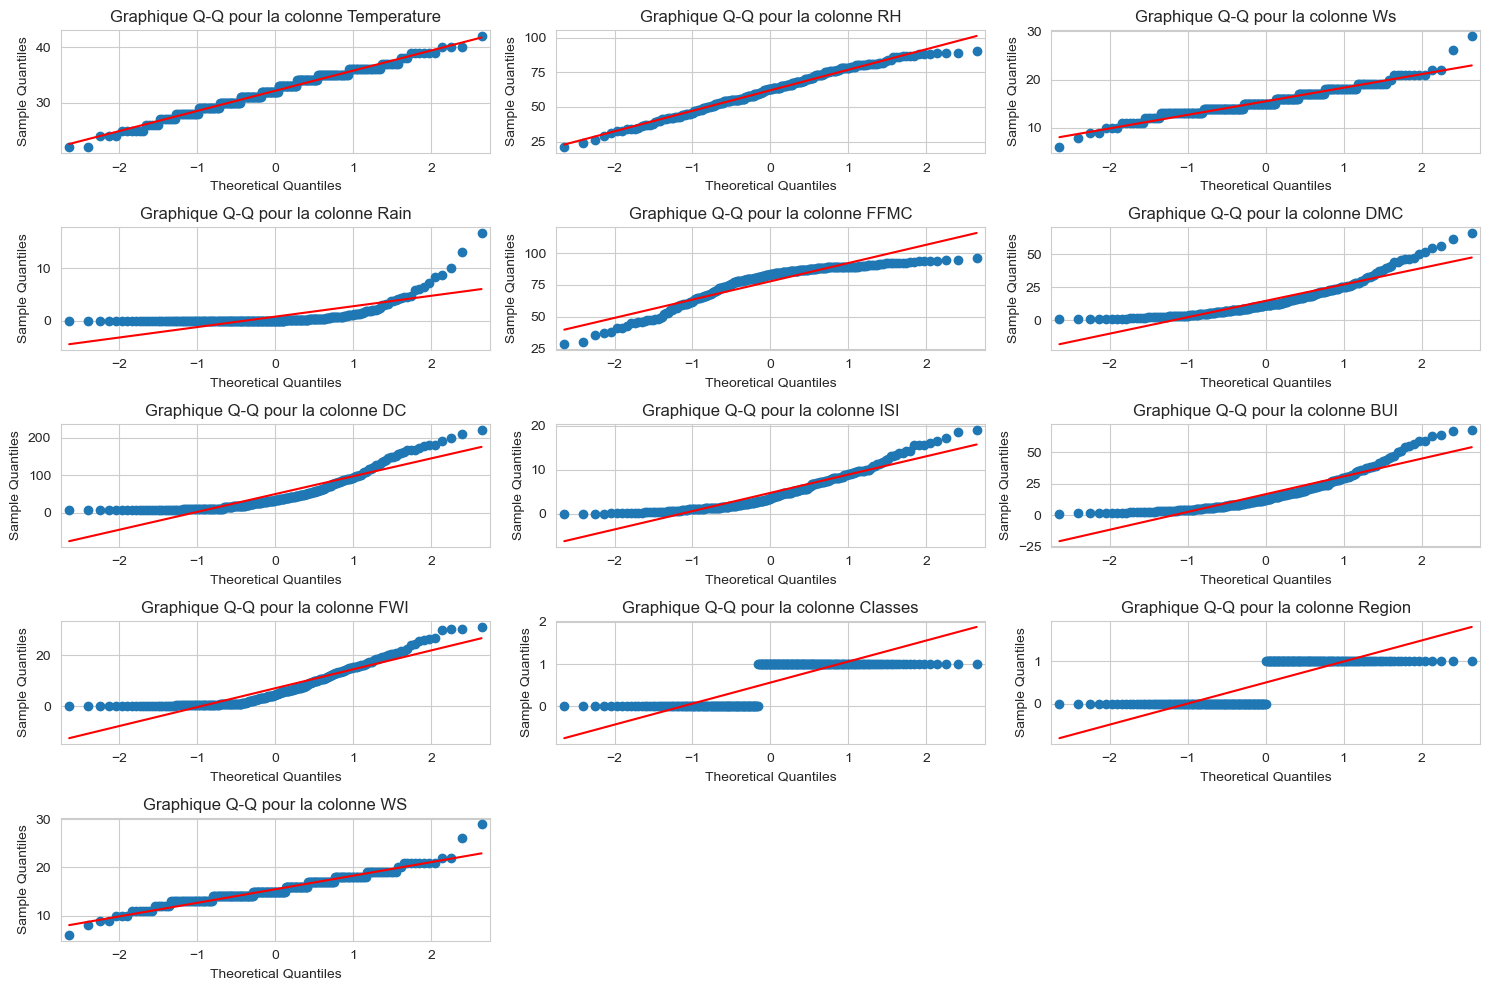

In [46]:
# Visualisons les distribution de chaque colonne avec les graphs Q-Q
import statsmodels.api as sm
import matplotlib.pyplot as plt

ncols = 3
nrows = int(np.ceil(len(df_copy.columns) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

for i, col in enumerate(df_copy.columns):
    ax = axes.flatten()[i]
    sm.qqplot(df_copy[col], line='s', ax=ax)
    ax.set_title(f'Graphique Q-Q pour la colonne {col}')

for j in range(i+1, nrows*ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [47]:
# Supprimons des valeurs aberrante avec le IQR
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1

df_copy = df_copy[~((df_copy < (Q1 - 1.5 * IQR)) | (df_copy > (Q3 + 1.5 * IQR))).any(axis=1)]

Text(0.5, 1.0, 'Données')

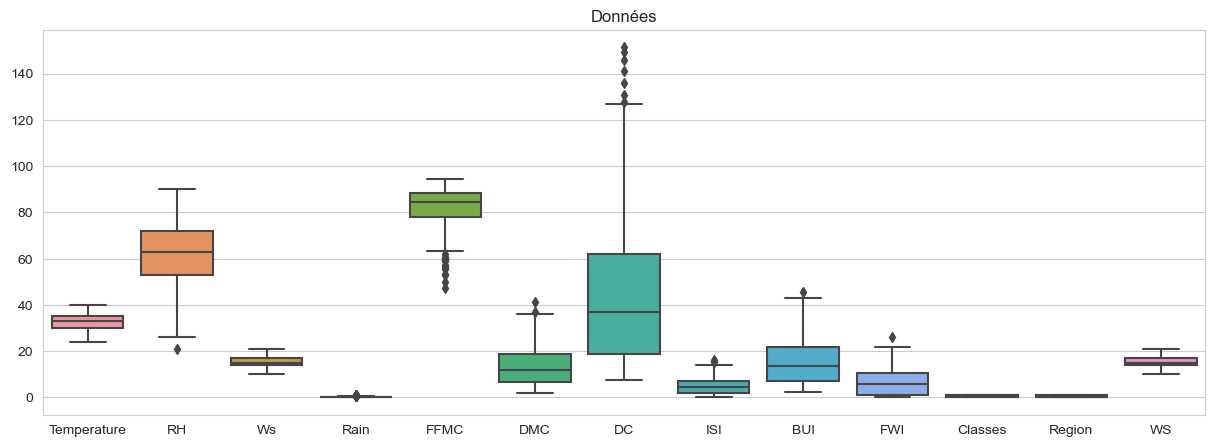

In [48]:
plt.subplots(figsize=(15, 5))
# plt.subplot(1, 2, 1)
sns.boxplot(data=df_copy)
plt.title('Données')

# Sauvegarde

In [49]:
# Sauvegarde du dataset nettoyge et EDA
df_copy.to_csv("Algerian_forest_fires_cleaned_dataset.csv", index=False)

# Modèle Machine Learning

In [50]:
df_ml = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [51]:
df_ml_copy = df_ml.copy()
df_ml_copy, df_ml_copy.shape

(     Temperature  RH    Ws  Rain  FFMC   DMC     DC  ISI   BUI   FWI  Classes  \
 0             29  57  18.0   0.0  65.7   3.4    7.6  1.3   3.4   0.5        0   
 1             27  77  16.0   0.0  64.8   3.0   14.2  1.2   3.9   0.5        0   
 2             31  67  14.0   0.0  82.6   5.8   22.2  3.1   7.0   2.5        1   
 3             33  54  13.0   0.0  88.2   9.9   30.5  6.4  10.9   7.2        1   
 4             30  73  15.0   0.0  86.6  12.1   38.3  5.6  13.5   7.1        1   
 ..           ...  ..   ...   ...   ...   ...    ...  ...   ...   ...      ...   
 172           35  56  14.0   0.0  89.0  29.4  115.6  7.5  36.0  15.2        1   
 173           28  70  15.0   0.0  79.9  13.8   36.1  2.4  14.1   3.0        0   
 174           30  65  14.0   0.0  85.4  16.0   44.5  4.5  16.9   6.5        1   
 175           24  54  18.0   0.1  79.7   4.3   15.2  1.7   5.1   0.7        0   
 176           24  64  15.0   0.2  67.3   3.8   16.5  1.2   4.8   0.5        0   
 
      Region  

## Entrainement avec utilisation de toutes les variables)

In [52]:
# Variable indépendante et dependente
X = df_ml_copy.drop('Classes', axis = 1)
y = df_ml_copy['Classes']

In [53]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
X_train.shape, X_test.shape

((132, 12), (45, 12))

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

### Box plot pour comprendre l'effet de la standardisation

Text(0.5, 1.0, 'X_train après la standardisation')

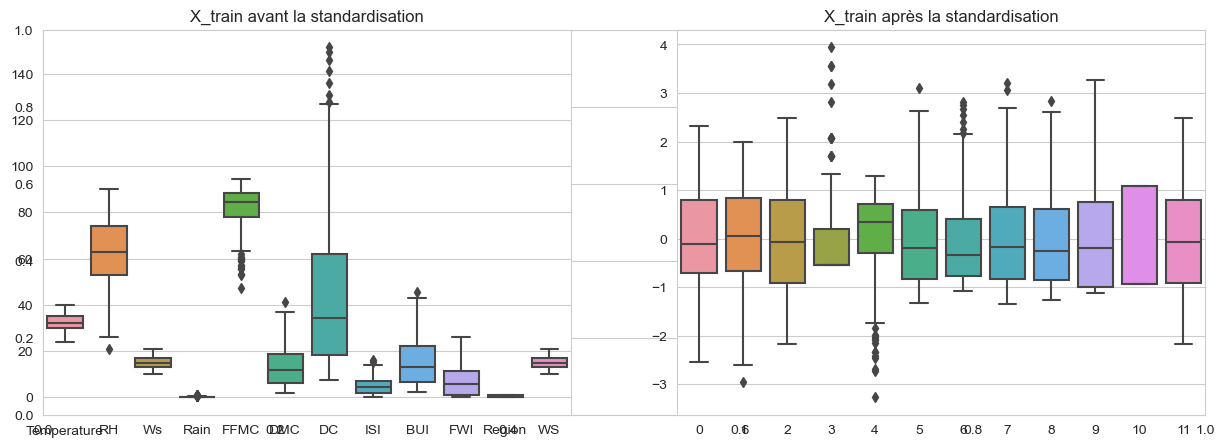

In [57]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train avant la standardisation')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_standard)
plt.title('X_train après la standardisation')

## Regression Logistique

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [59]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_standard,y_train)

LogisticRegression()

In [60]:
y_pred = logistic_regression.predict(X_test_standard)

mae = metrics.mean_absolute_error(y_test, y_pred)
score_r2 = metrics.r2_score(y_test, y_pred)

print("Erreur absolue moyenne:", mae)
print(f"r2 Score: {score_r2}")
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))


Erreur absolue moyenne: 0.06666666666666667
r2 Score: 0.709051724137931
Accuracy:  0.9333333333333333


## Entrainement avec Sélection de Variables

<Axes: >

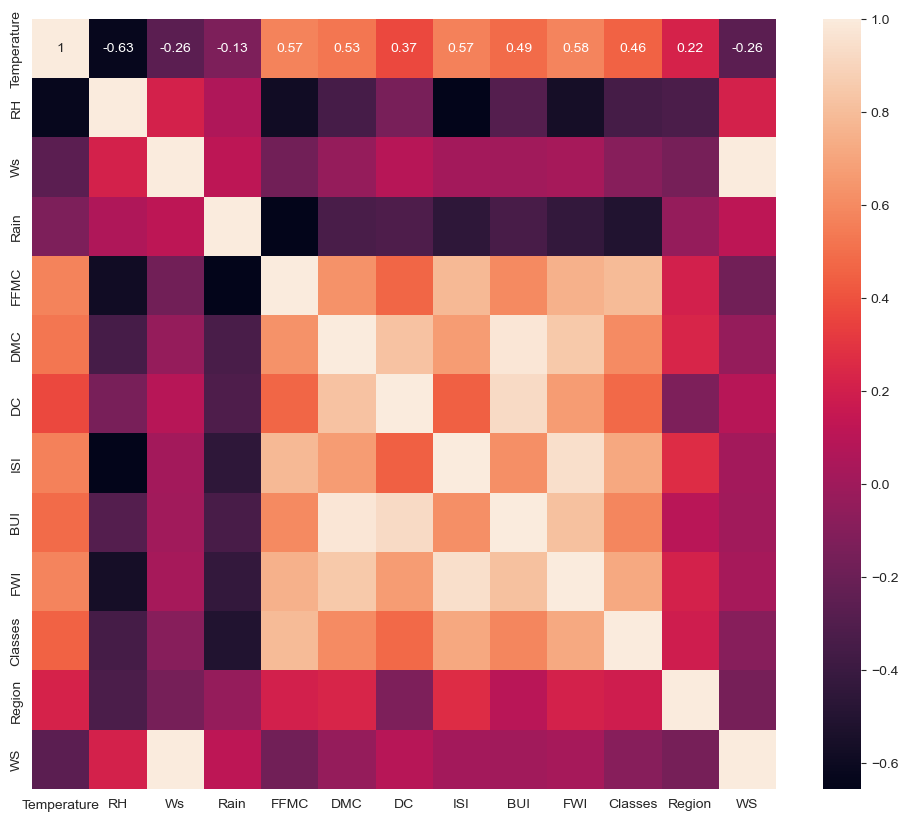

In [61]:
# Correlation
plt.figure(figsize=(12, 10))
corr = df_ml_copy.corr()
sns.heatmap(corr, annot=True)

<Axes: >

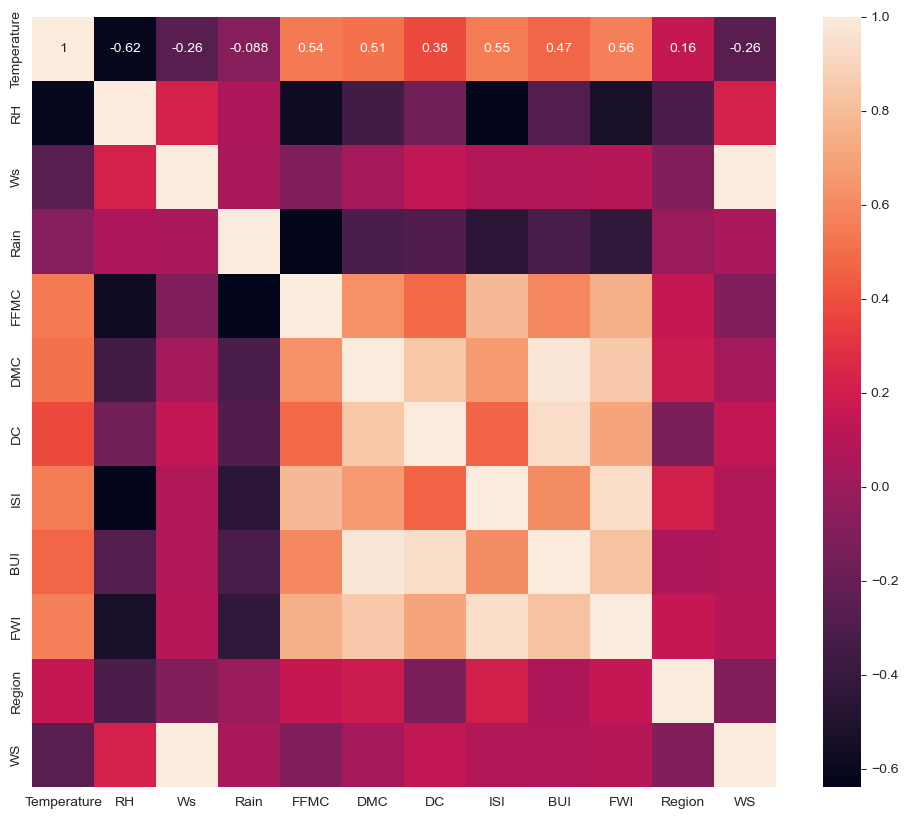

In [62]:
# Vérfions la multicollinéarité
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [63]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [64]:
corr_features = correlation(X_train, 0.90)
corr_features

{'DC', 'DMC', 'ISI', 'Ws'}

In [65]:
# Suppression des variables qui sont correlées entre elles à 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((132, 8), (45, 8))

In [66]:
# Standardisation de ces nouvelles données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train après la standardisation')

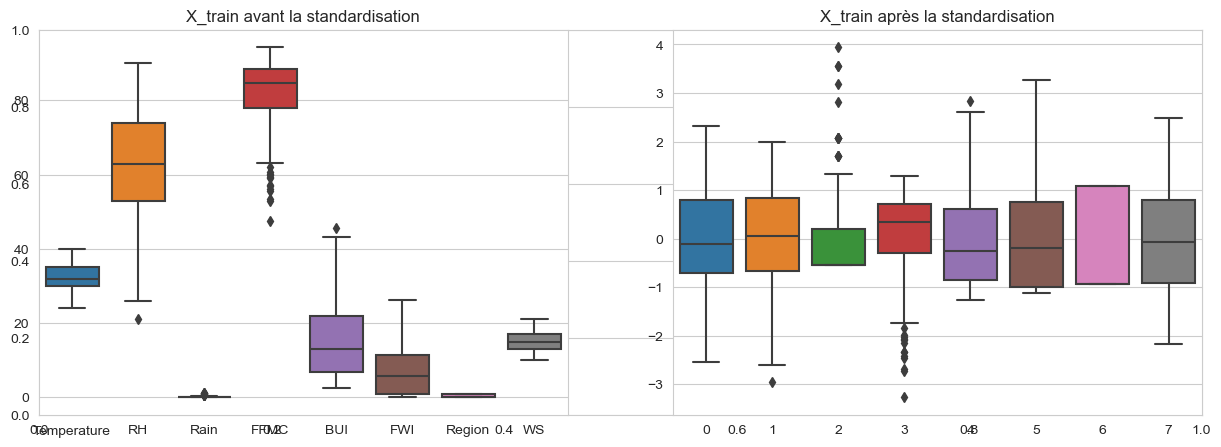

In [67]:
# Visualisation
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train avant la standardisation')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_standard)
plt.title('X_train après la standardisation')

In [68]:
# Utilisation de la Regression Logistique
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [69]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_standard,y_train)

LogisticRegression()

In [70]:
y_pred = logistic_regression.predict(X_test_standard)

mae = metrics.mean_absolute_error(y_test, y_pred)
score_r2 = metrics.r2_score(y_test, y_pred)

print("Erreur absolue moyenne:", mae)
print(f"r2 Score: {score_r2}")
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))


Erreur absolue moyenne: 0.044444444444444446
r2 Score: 0.8060344827586207
Accuracy:  0.9555555555555556


In [71]:
# Sauvegardons le modèle
from joblib import dump

dump(logistic_regression, 'model_fire.joblib')


['model_fire.joblib']

# Conclusion

1.  mis en place un modèle de régression logistique pour prédire si un feu se produira ou non.
2. Utilisations de toutes les variables disponibles.
3. Amélioration des performances du modèle avec une sélection de variable
4. Avec toutes les variables, le modèle a obtenu une MAE de 0.067, un score r2 de 0.71 et une accuracy de 93.3%.
5. Après la sélection de variables, la performance du modèle s’est améliorée avec une MAE de 0.044, un score r2 de 0.806 et une accuracy de 95.6%.
6. Utilisation de techniques de régularisation, comme Lasso et Ridge.
7. Ces techniques n’ont pas amélioré la performance du modèle, indiquant que notre modèle initial était déjà bien ajusté et qu’il n’y avait pas de surajustement, donc j'ai dû laisser.
8. En conclusion, le modèle de régression logistique, avec une sélection appropriée de variables, a été capable de prédire avec précision si un feu se produira ou non dans 95.6% des cas.
   ntes cas.